In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import datetime as dt


#Visualizations
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


# ML Matrix + Performance params
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

#Fixing Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.pipeline import Pipeline


#Load the ML Algos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.cluster import DBSCAN

# Geospatial
import contextily as cx
from shapely.geometry import Point, Polygon
import xarray as xr
import rasterio.features
import rasterio as rio
import fsspec

# API
import requests
import json

# Import Planetary Computer
# import stackstac
import pystac
import pystac_client
import planetary_computer

# Other
import os
from itertools import cycle

C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\xarray\backends\cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [2]:
df1 = pd.read_csv('Level_1_challenge_1_submission_template.csv')

In [3]:
df1.head()

,id,decimalLatitude,decimalLongitude,occurrenceStatus
0,0,-37.917146,145.207706,NaN
1,1,-37.750974,144.981501,NaN
2,2,-37.961600,145.348000,NaN
3,3,-37.621300,145.003000,NaN
4,4,-38.498100,145.647000,NaN


In [4]:
df1.decimalLatitude.max()

-16.7442

In [5]:
df1.iloc[:,1:3]

,decimalLatitude,decimalLongitude
0,-37.917146,145.207706
1,-37.750974,144.981501
2,-37.961600,145.348000
3,-37.621300,145.003000
4,-38.498100,145.647000
...,...,...
4046,-31.884385,116.150192
4047,-32.412962,115.779737
4048,-32.147959,115.856628
4049,-31.827000,116.238000


In [6]:
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan.fit(df1.iloc[:,1:3])

DBSCAN(eps=2, min_samples=10)

In [7]:
dbscan.labels_

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [8]:
data_dbscan = df1.iloc[:,1:3].copy()
data_dbscan['clusters_dbscan'] = dbscan.labels_
data_dbscan['clusters_dbscan'].value_counts()

0    1491
1    1171
2     663
4     598
3     128
Name: clusters_dbscan, dtype: int64

In [9]:
data_dbscan

,decimalLatitude,decimalLongitude,clusters_dbscan
0,-37.917146,145.207706,0
1,-37.750974,144.981501,0
2,-37.961600,145.348000,0
3,-37.621300,145.003000,0
4,-38.498100,145.647000,0
...,...,...,...
4046,-31.884385,116.150192,4
4047,-32.412962,115.779737,4
4048,-32.147959,115.856628,4
4049,-31.827000,116.238000,4


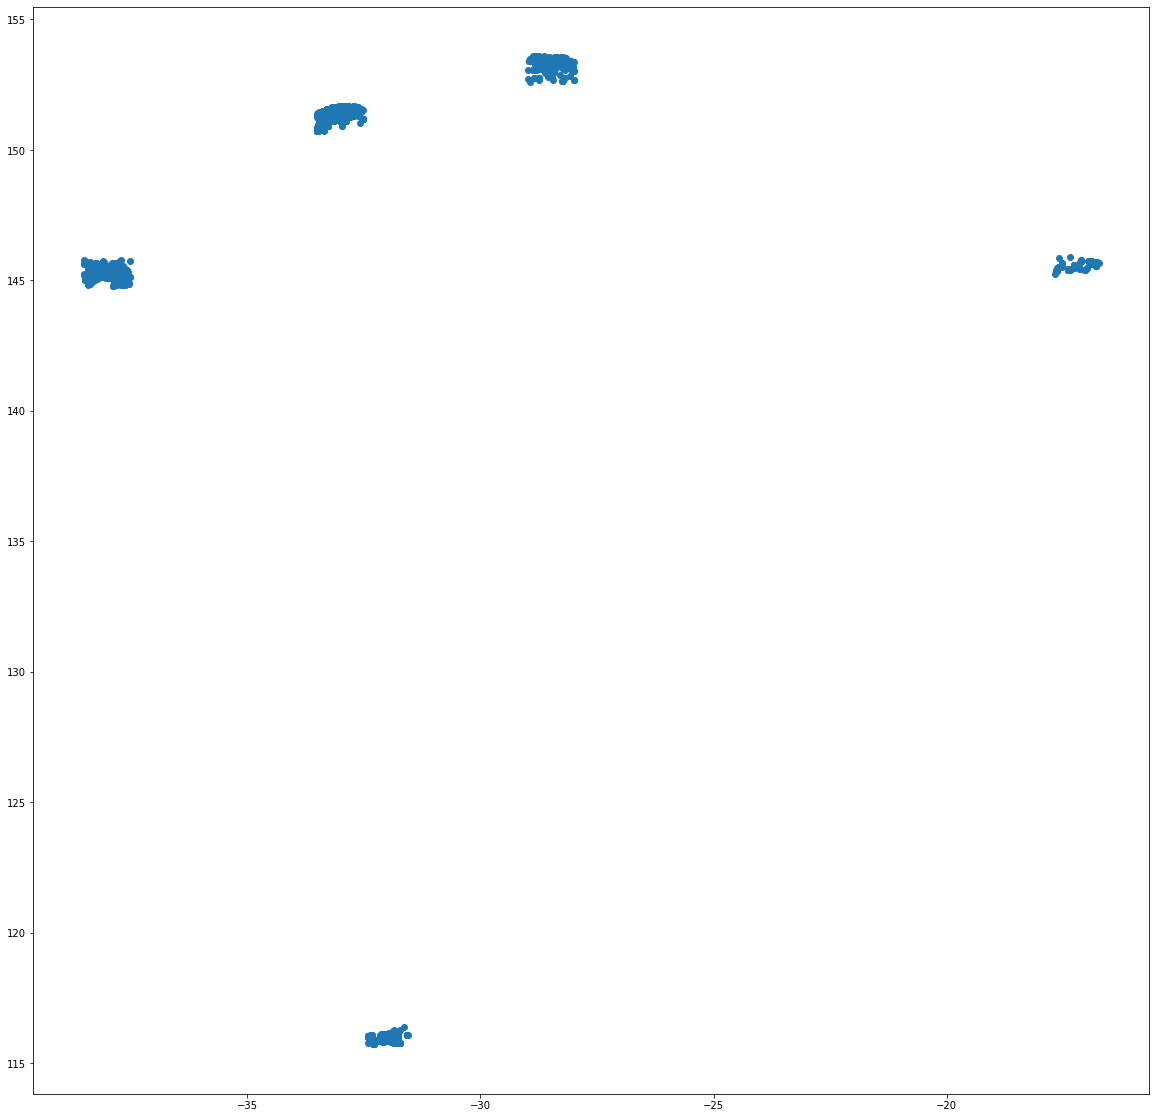

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
plt.scatter(df1.decimalLatitude,df1.decimalLongitude)

In [11]:
data_dbscan.clusters_dbscan.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [12]:
d = 9

print(f'The age of my car is {d}')

The age of my car is 9


In [13]:
def plot_bbox_cluster(data):
    bbox_dict = {}
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    plt.scatter(data.decimalLatitude,data.decimalLongitude)
    #{clusterno:[min_lon,min_lat,max_lon, max_lat]}
    for x in list(data.clusters_dbscan.unique()):
        cluster_temp = data_dbscan.loc[data_dbscan.clusters_dbscan == x].copy()
        max_lat = cluster_temp.decimalLatitude.max()
        min_lat = cluster_temp.decimalLatitude.min()
        max_lon = cluster_temp.decimalLongitude.max()
        min_lon = cluster_temp.decimalLongitude.min()
        bbox_dict[f'{x}']=(min_lon,min_lat,max_lon, max_lat)
        left, bottom, width, height = (min_lat-0.25, min_lon-0.25, (max_lat-min_lat)+0.5, (max_lon-min_lon)+0.5)
        rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.5,
                       facecolor="red")
        plt.gca().add_patch(rect)
        
    plt.show()
    return bbox_dict

        
    
    

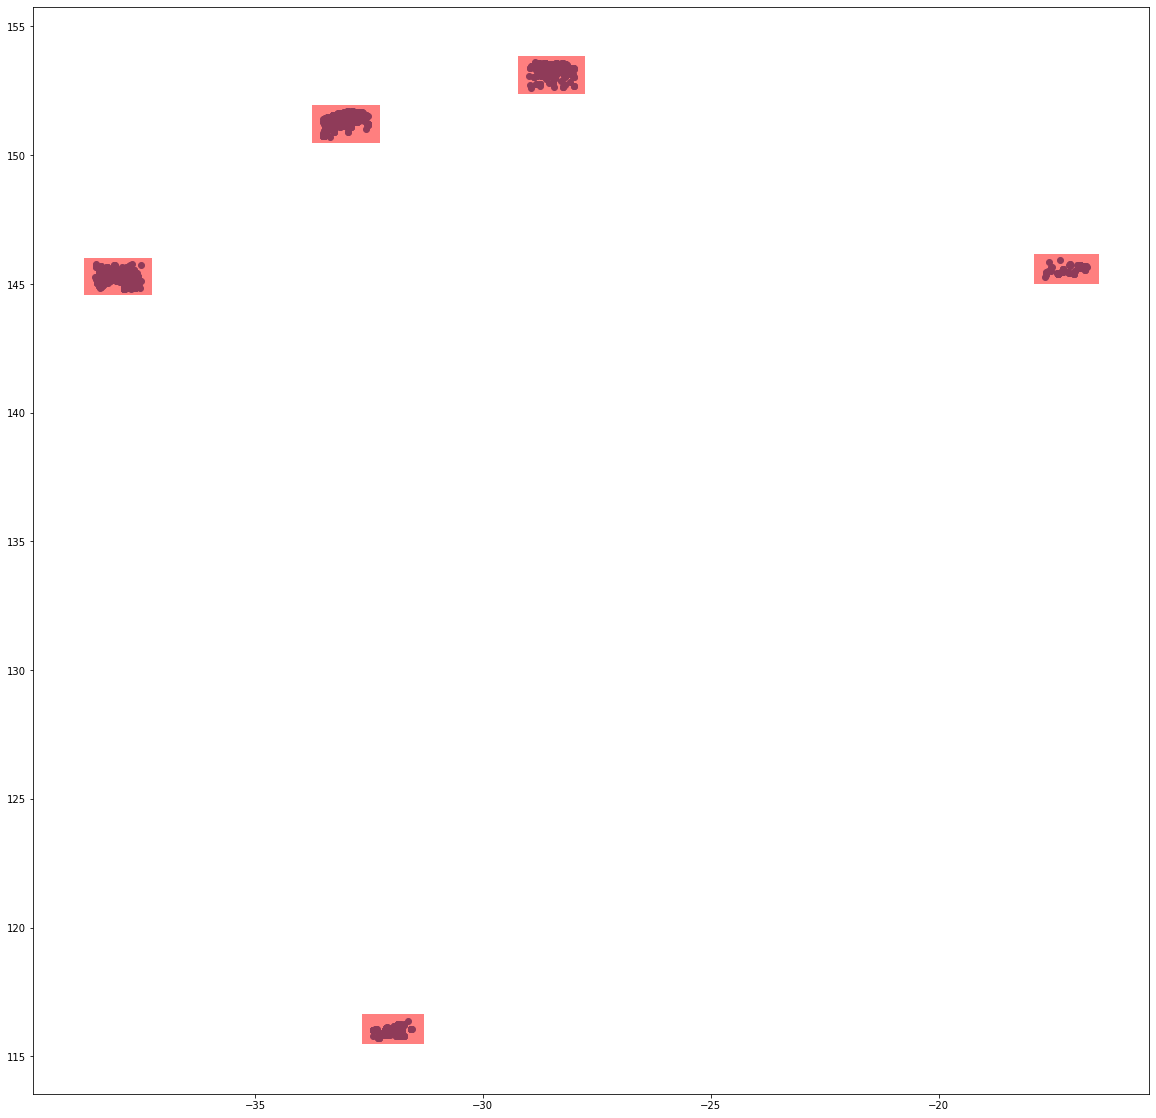

In [14]:
bbox_coordinates = plot_bbox_cluster(data_dbscan)

In [15]:
list(bbox_coordinates.values())[:-1]

[(144.800515, -38.49989934, 145.7671922, -37.51085308),
 (150.71, -33.49989273, 151.6999572, -32.51836843),
 (152.61, -28.99, 153.6, -28.00067739),
 (145.2511412, -17.67161479, 145.911, -16.7442)]

In [16]:
for x in bbox_coordinates:
    print(bbox_coordinates[x])

(144.800515, -38.49989934, 145.7671922, -37.51085308)
(150.71, -33.49989273, 151.6999572, -32.51836843)
(152.61, -28.99, 153.6, -28.00067739)
(145.2511412, -17.67161479, 145.911, -16.7442)
(115.7160036, -32.41296172, 116.3773691, -31.5516)


In [17]:
bbox_coordinates.pop('4')
bbox_coordinates

{'0': (144.800515, -38.49989934, 145.7671922, -37.51085308),
 '1': (150.71, -33.49989273, 151.6999572, -32.51836843),
 '2': (152.61, -28.99, 153.6, -28.00067739),
 '3': (145.2511412, -17.67161479, 145.911, -16.7442)}

In [18]:
bbox_coordinates =  {'0' : (144.8,-38.5,145.8,-37.5),
                     '1' : (150.7,-33.5,151.7,-32.5),
                     '2' : (152.6,-29.0,153.6,-28.0),
                     '3' : (145.0,-17.7,146.0,-16.7),
                     '4' : (115.7,-32.5,116.7,-31.5)}

In [19]:
def filter_bbox(frogs, bbox_clusters):
    frogs_fnl = pd.DataFrame()
    for y in bbox_clusters:
        frogs_temp = frogs[lambda x: 
            (x.decimalLongitude >= bbox_clusters[y][0]) &
            (x.decimalLatitude >= bbox_clusters[y][1]) &
            (x.decimalLongitude <= bbox_clusters[y][2]) &
            (x.decimalLatitude <= bbox_clusters[y][3])    ]
        frogs_temp.cluster = y
        frogs_fnl = pd.concat([frogs_fnl,frogs_temp])
    return frogs_fnl

def get_frogs(file, year_range=None, bbox_clusters=None):
    """Returns the dataframe of all frog occurrences for the bounding box specified."""
    columns = [
        'gbifID','eventDate','country','continent','stateProvince',
        'decimalLatitude','decimalLongitude','species'
    ]
    country_names = {
        'AU':'Australia', 'CR':'Costa Rica', 'ZA':'South Africa','MX':'Mexico','HN':'Honduras',
        'MZ':'Mozambique','BW':'Botswana','MW':'Malawi','CO':'Colombia','PA':'Panama','NI':'Nicaragua',
        'BZ':'Belize','ZW':'Zimbabwe','SZ':'Eswatini','ZM':'Zambia','GT':'Guatemala','LS':'Lesotho',
        'SV':'El Salvador', 'AO':'Angola', np.nan:'unknown or invalid'
    }
    continent_names = {
        'AU':'Australia', 'CR':'Central America', 'ZA':'Africa','MX':'Central America','HN':'Central America',
        'MZ':'Africa','BW':'Africa','MW':'Africa','CO':'Central America','PA':'Central America',
        'NI':'Central America','BZ':'Central America','ZW':'Africa','SZ':'Africa','ZM':'Africa',
        'GT':'Central America','LS':'Africa','SV':'Central America','AO':'Africa', np.nan:'unknown or invalid' 
    }
    frogs = (
        pd.read_csv('occurrence.txt', sep='\t', parse_dates=['eventDate'])
        .assign(
            country =  lambda x: x.countryCode.map(country_names),
            continent =  lambda x: x.countryCode.map(continent_names),
            species = lambda x: x.species.str.title()
        )
        [columns]
    )
    
    frogs['cluster'] = np.nan
    
    if year_range is not None:
        frogs = frogs[lambda x: 
            (x.eventDate.dt.year >= year_range[0]) & 
            (x.eventDate.dt.year <= year_range[1])
        ]
    if bbox_clusters is not None:
        frogs = filter_bbox(frogs, bbox_clusters)
    return frogs

In [20]:
# Load in data
all_frog_data = get_frogs('occurrence.txt', year_range=(2000, 2021), bbox_clusters=bbox_coordinates)
all_frog_data

C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (2,9,35,39,42,46,47,48,54,56,57,58,59,60,62,64,65,66,68,69,70,71,74,75,76,77,78,79,82,84,85,86,87,88,89,90,92,96,97,99,101,103,109,110,111,114,115,116,117,118,119,120,121,122,123,126,127,128,129,130,135,136,142,143,145,147,148,149,150,151,161,165,170,172,173,174,175,176,177,178,179,180,181,185,189,190,191,192,193,195,207,210,212,215,217,225,226,242,246,254,255) have mixed types.Specify dtype option on import or set low_memory=False.
  
C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,cluster
2780,1633803922,2017-08-05 20:51:00,Australia,Australia,Victoria,-38.045122,145.326047,Crinia Signifera,0
3279,3384896595,2021-10-07 07:58:39,Australia,Australia,Victoria,-38.030947,145.432053,Crinia Signifera,0
4737,3463456338,2018-11-09 00:00:00,Australia,Australia,Victoria,-38.088716,145.722909,Crinia Signifera,0
4780,3463456499,2019-07-30 00:00:00,Australia,Australia,Victoria,-37.807553,145.263607,Crinia Signifera,0
4787,3463456516,2020-08-23 00:00:00,Australia,Australia,Victoria,-37.991842,145.118825,Crinia Signifera,0
...,...,...,...,...,...,...,...,...,...
95809,1640023933,2017-09-09 16:00:00,Australia,Australia,Western Australia,-31.933553,115.909463,Crinia Glauerti,4
95839,1632969821,2016-04-13 08:04:00,Australia,Australia,Western Australia,-32.014768,115.895289,Crinia Glauerti,4
149899,3381434234,2017-11-18 00:00:00,Australia,Australia,Western Australia,-32.242003,115.834441,Crinia Signifera,4
151331,3381443465,2017-11-17 00:00:00,Australia,Australia,Western Australia,-31.775465,115.742627,Crinia Signifera,4


In [21]:
all_frog_data.cluster.value_counts()

1    15600
0     7043
4     6714
2     2989
3     1344
Name: cluster, dtype: int64

In [22]:
all_frog_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33690 entries, 2780 to 152823
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gbifID            33690 non-null  int64         
 1   eventDate         33690 non-null  datetime64[ns]
 2   country           33690 non-null  object        
 3   continent         33690 non-null  object        
 4   stateProvince     33690 non-null  object        
 5   decimalLatitude   33690 non-null  float64       
 6   decimalLongitude  33690 non-null  float64       
 7   species           33690 non-null  object        
 8   cluster           33690 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.6+ MB


In [23]:
all_frog_data.species.value_counts() #Class imbalance exits

Crinia Signifera             15573
Litoria Fallax               11200
Crinia Glauerti               6711
Austrochaperina Pluvialis      206
Name: species, dtype: int64

In [24]:
target_species = 'Litoria Fallax'

all_frog_data = (
    all_frog_data
    # Assign the occurrenceStatus to 1 for the target species and 0 for all other species.
    # as well as a key for joining (later)
    .reset_index(drop=True).assign(
        occurrenceStatus = lambda x: np.where(x.species == target_species, 1, 0),
        key= lambda x: x.index
    )
)
all_frog_data

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,cluster,occurrenceStatus,key
0,1633803922,2017-08-05 20:51:00,Australia,Australia,Victoria,-38.045122,145.326047,Crinia Signifera,0,0,0
1,3384896595,2021-10-07 07:58:39,Australia,Australia,Victoria,-38.030947,145.432053,Crinia Signifera,0,0,1
2,3463456338,2018-11-09 00:00:00,Australia,Australia,Victoria,-38.088716,145.722909,Crinia Signifera,0,0,2
3,3463456499,2019-07-30 00:00:00,Australia,Australia,Victoria,-37.807553,145.263607,Crinia Signifera,0,0,3
4,3463456516,2020-08-23 00:00:00,Australia,Australia,Victoria,-37.991842,145.118825,Crinia Signifera,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
33685,1640023933,2017-09-09 16:00:00,Australia,Australia,Western Australia,-31.933553,115.909463,Crinia Glauerti,4,0,33685
33686,1632969821,2016-04-13 08:04:00,Australia,Australia,Western Australia,-32.014768,115.895289,Crinia Glauerti,4,0,33686
33687,3381434234,2017-11-18 00:00:00,Australia,Australia,Western Australia,-32.242003,115.834441,Crinia Signifera,4,0,33687
33688,3381443465,2017-11-17 00:00:00,Australia,Australia,Western Australia,-31.775465,115.742627,Crinia Signifera,4,0,33688


In [25]:
all_frog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33690 entries, 0 to 33689
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gbifID            33690 non-null  int64         
 1   eventDate         33690 non-null  datetime64[ns]
 2   country           33690 non-null  object        
 3   continent         33690 non-null  object        
 4   stateProvince     33690 non-null  object        
 5   decimalLatitude   33690 non-null  float64       
 6   decimalLongitude  33690 non-null  float64       
 7   species           33690 non-null  object        
 8   cluster           33690 non-null  object        
 9   occurrenceStatus  33690 non-null  int32         
 10  key               33690 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 2.7+ MB


In [26]:
len(all_frog_data.key.unique())

33690

In [27]:
all_frog_data.occurrenceStatus.value_counts()

0    22490
1    11200
Name: occurrenceStatus, dtype: int64

In [28]:
all_frog_data["Year"] = all_frog_data.eventDate.dt.year

In [29]:
all_frog_data.groupby('Year').count()

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,cluster,occurrenceStatus,key
Year,,,,,,,,,,,
2000,294,294,294,294,294,294,294,294,294,294,294
2001,352,352,352,352,352,352,352,352,352,352,352
2002,276,276,276,276,276,276,276,276,276,276,276
2003,335,335,335,335,335,335,335,335,335,335,335
2004,396,396,396,396,396,396,396,396,396,396,396
2005,373,373,373,373,373,373,373,373,373,373,373
2006,302,302,302,302,302,302,302,302,302,302,302
2007,493,493,493,493,493,493,493,493,493,493,493
2008,439,439,439,439,439,439,439,439,439,439,439


In [30]:
frog_trend = all_frog_data.groupby('Year').count()['occurrenceStatus'].copy()

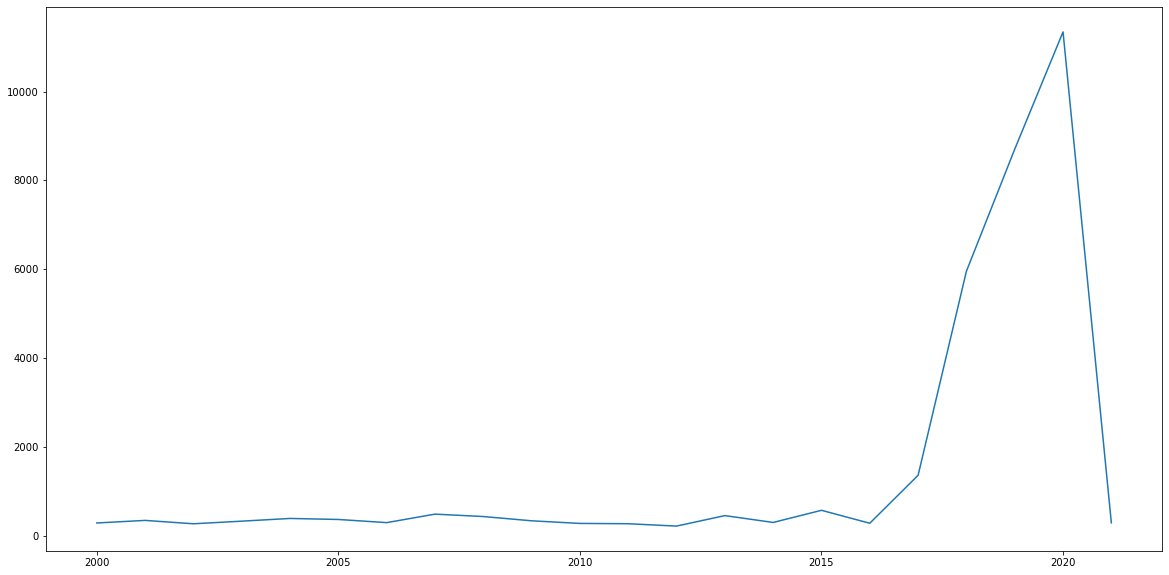

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(frog_trend)

Text(0.5, 1.0, 'Training set for Aus')

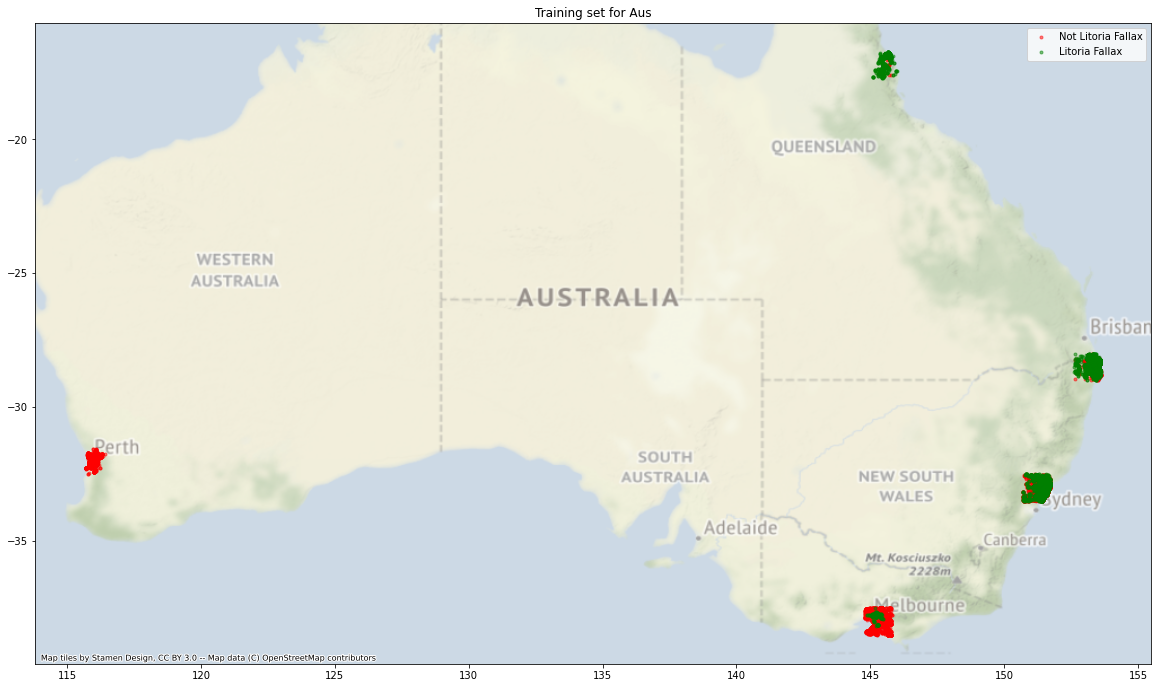

In [32]:
fig, ax = plt.subplots(figsize = (20, 20))

filt = all_frog_data.occurrenceStatus == 1
ax.scatter(all_frog_data[~filt].decimalLongitude, all_frog_data[~filt].decimalLatitude,
           color = 'red', marker='.', alpha=0.5, label=f"Not {target_species}")
ax.scatter(all_frog_data[filt].decimalLongitude, all_frog_data[filt].decimalLatitude,
           color = 'green', marker='.', alpha=0.5, label=target_species)
ax.legend()
cx.add_basemap(ax, crs={'init':'epsg:4326'}, alpha=0.5)
ax.set_title(f"Training set for Aus")

In [33]:
for x in bbox_coordinates.values():
    print(x)

(144.8, -38.5, 145.8, -37.5)
(150.7, -33.5, 151.7, -32.5)
(152.6, -29.0, 153.6, -28.0)
(145.0, -17.7, 146.0, -16.7)
(115.7, -32.5, 116.7, -31.5)


In [34]:
all_frog_data.columns


Index(['gbifID', 'eventDate', 'country', 'continent', 'stateProvince',
       'decimalLatitude', 'decimalLongitude', 'species', 'cluster',
       'occurrenceStatus', 'key', 'Year'],
      dtype='object')

In [35]:
all_frog_data.groupby(['cluster','occurrenceStatus']).count()['key']

cluster  occurrenceStatus
0        0                   6887
         1                    156
1        0                   7899
         1                   7701
2        0                    784
         1                   2205
3        0                    206
         1                   1138
4        0                   6714
Name: key, dtype: int64

<AxesSubplot:xlabel='decimalLongitude', ylabel='decimalLatitude'>

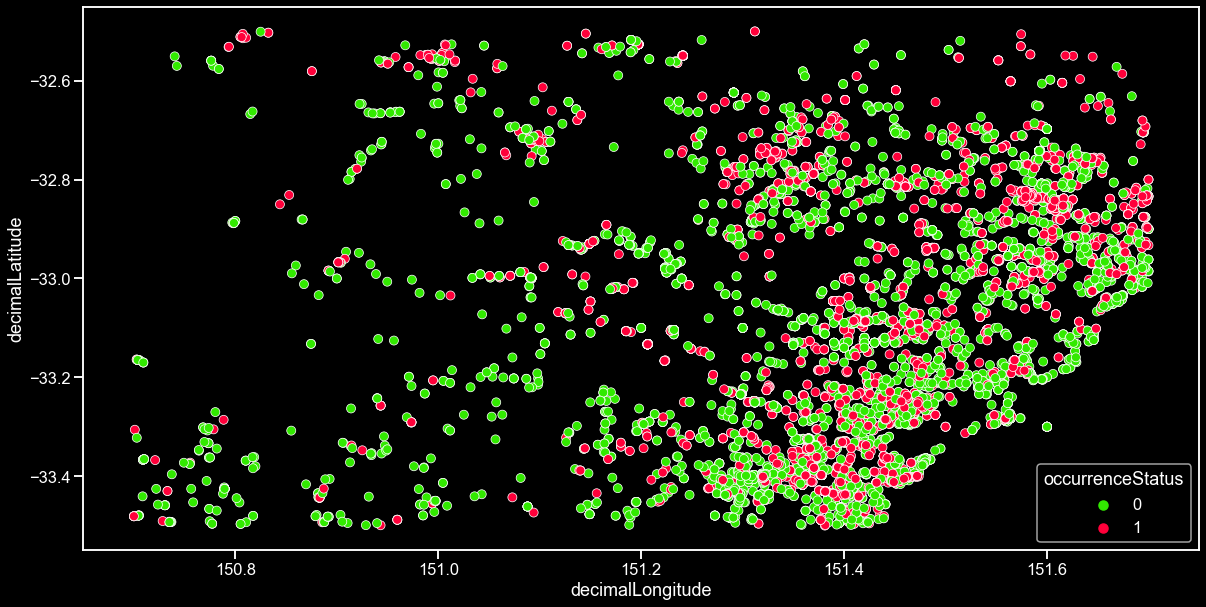

In [37]:
#Cluster plot
temp = all_frog_data.loc[all_frog_data.cluster == '1']
fig, ax = plt.subplots(figsize = (20, 10))
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
sns.scatterplot(x = temp.decimalLongitude,  
                y = temp.decimalLatitude, 
                hue=temp.occurrenceStatus, palette='prism')

<AxesSubplot:xlabel='decimalLongitude', ylabel='decimalLatitude'>

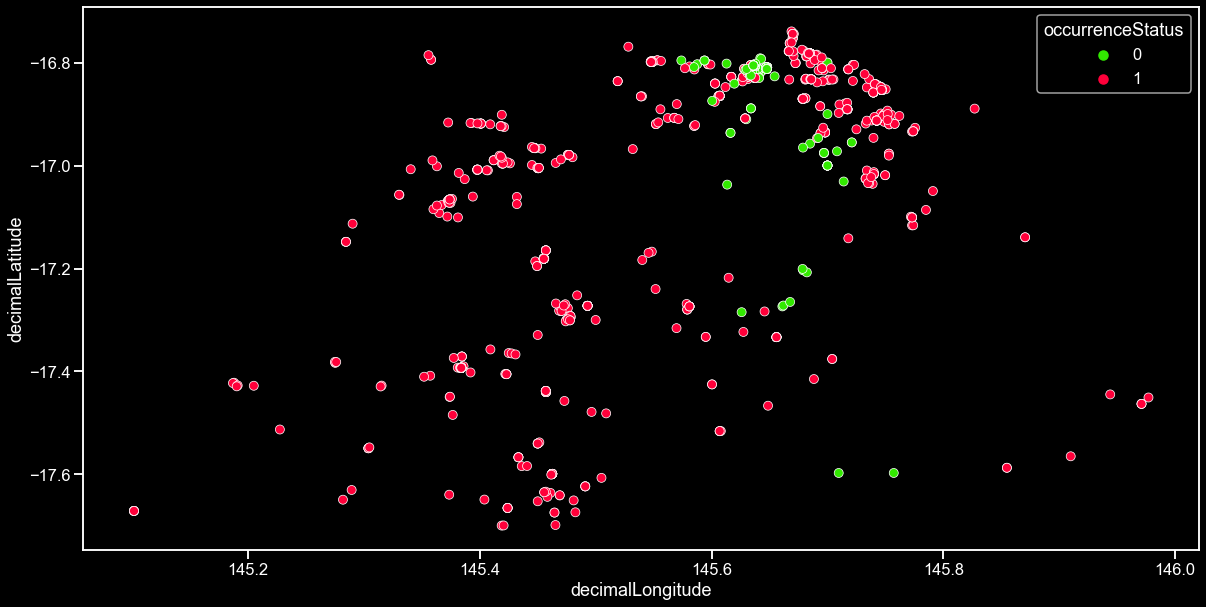

In [38]:
temp = all_frog_data.loc[all_frog_data.cluster == '3']
fig, ax = plt.subplots(figsize = (20, 10))

sns.scatterplot(x = temp.decimalLongitude,  
                y = temp.decimalLatitude, 
                hue=temp.occurrenceStatus, palette='prism')

<AxesSubplot:xlabel='decimalLongitude', ylabel='decimalLatitude'>

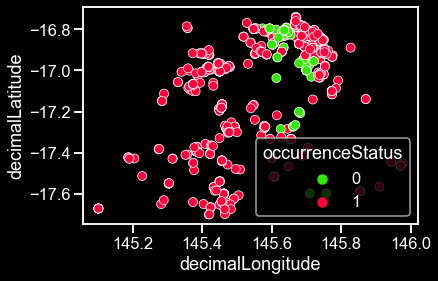

In [39]:
sns.scatterplot(x = temp.decimalLongitude,  
                y = temp.decimalLatitude, 
                hue=temp.occurrenceStatus, palette='prism')

<AxesSubplot:xlabel='decimalLongitude', ylabel='decimalLatitude'>

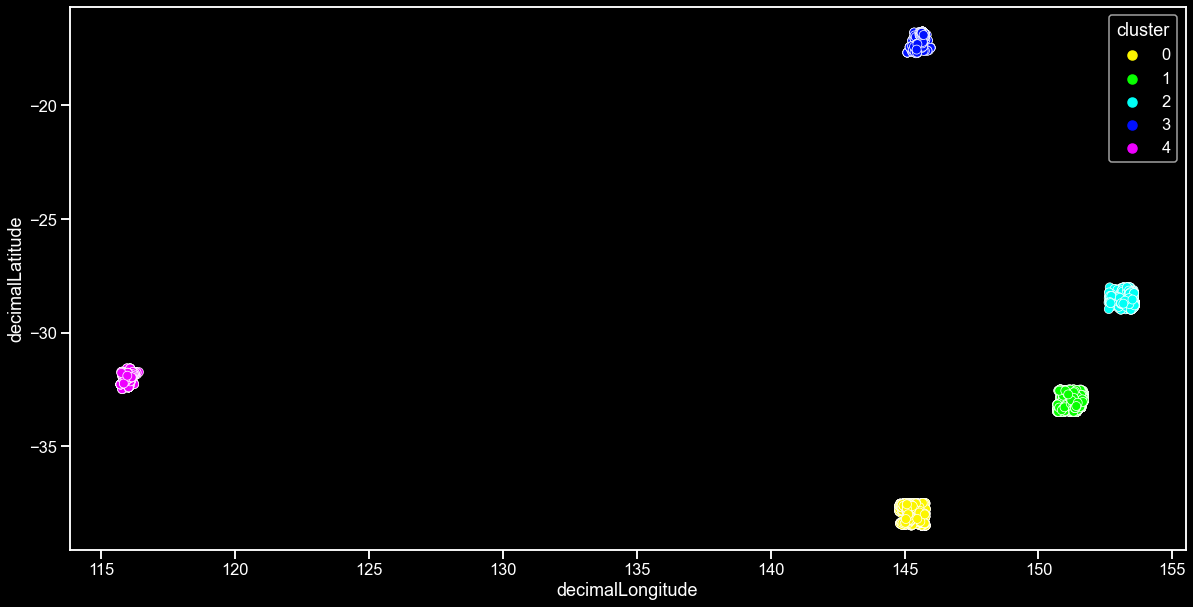

In [40]:
new_temp = all_frog_data.loc[all_frog_data.cluster.isin(['0','1','2','4','3'])]
fig, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x = new_temp.decimalLongitude,  
                y = new_temp.decimalLatitude, 
                hue=new_temp.cluster, palette='hsv')

In [41]:
all_frog_data.groupby(['cluster','occurrenceStatus']).count()['key']
#optimal manual 0  - 10,341
#optimal manual 1  - 9,434

cluster  occurrenceStatus
0        0                   6887
         1                    156
1        0                   7899
         1                   7701
2        0                    784
         1                   2205
3        0                    206
         1                   1138
4        0                   6714
Name: key, dtype: int64

Counter({0: 6887, 1: 156})
Counter({0: 445, 1: 156})


Text(0.5, 1.0, 'cluster - After')

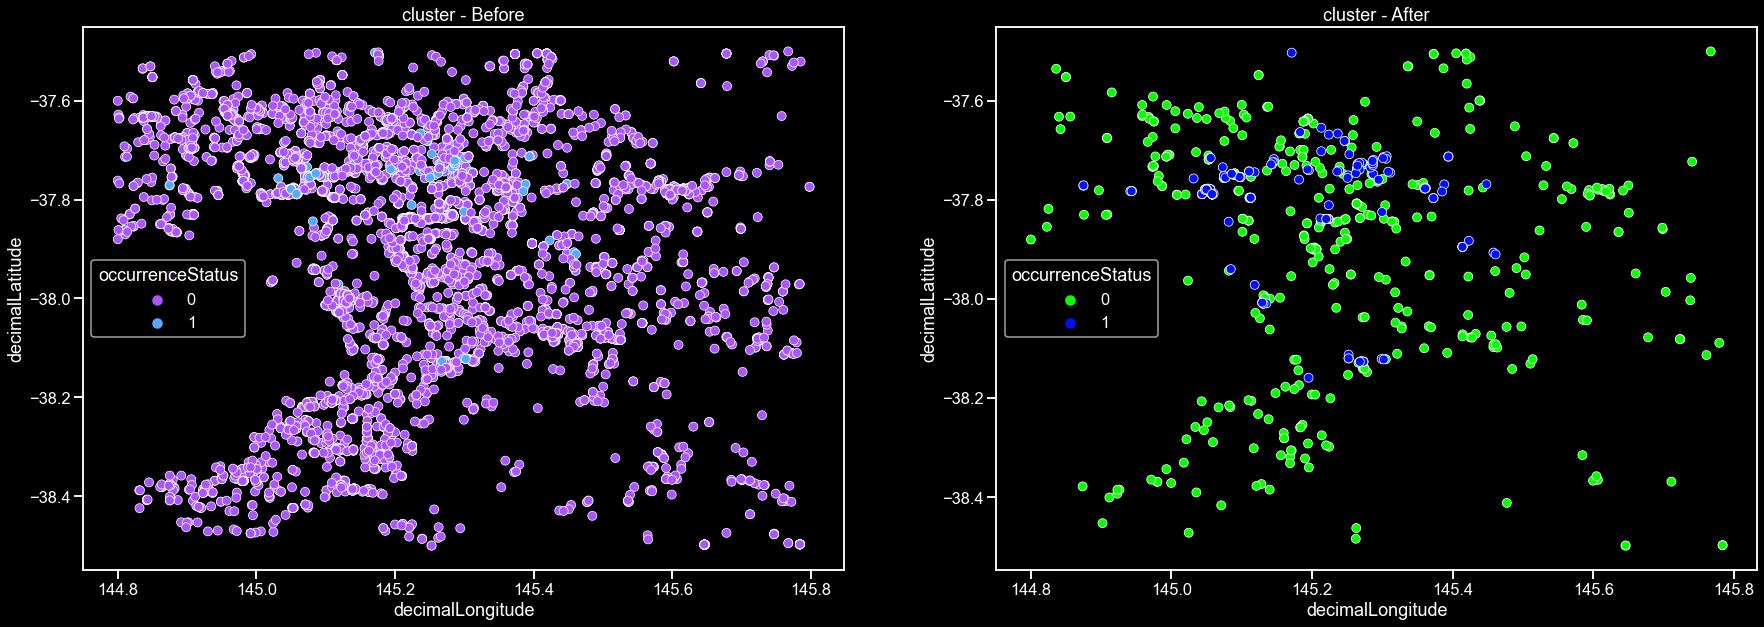

In [69]:
cluster0 = all_frog_data.loc[all_frog_data.cluster == '0'].copy()

X_balance_cluster0 = cluster0[[ 'decimalLatitude', 'decimalLongitude','cluster']]
y_balance_cluster0 = cluster0['occurrenceStatus']

# define undersample strategy
print(Counter(y_balance_cluster0))
undersample = RandomUnderSampler(sampling_strategy=0.35)
X_res, y_res = undersample.fit_resample(X_balance_cluster0, y_balance_cluster0)
print(Counter(y_res))
cluster0_fnl = pd.concat([X_res, y_res],axis=1)

fig, ax = plt.subplots(1,2, figsize = (30, 10))
sns.scatterplot(x = cluster0.decimalLongitude,  
                y = cluster0.decimalLatitude, 
                hue=cluster0.occurrenceStatus, palette='cool_r', ax=ax[0]).set_title('cluster - Before')
sns.scatterplot(x = cluster0_fnl.decimalLongitude,  
                y = cluster0_fnl.decimalLatitude, 
                hue=cluster0_fnl.occurrenceStatus, palette='hsv', ax=ax[1]).set_title('cluster - After')

In [87]:
cluster1_fnl = all_frog_data.loc[all_frog_data.cluster == '1'].copy()

Counter({1: 2205, 0: 784})
Counter({1: 1120, 0: 784})


Text(0.5, 1.0, 'cluster - After')

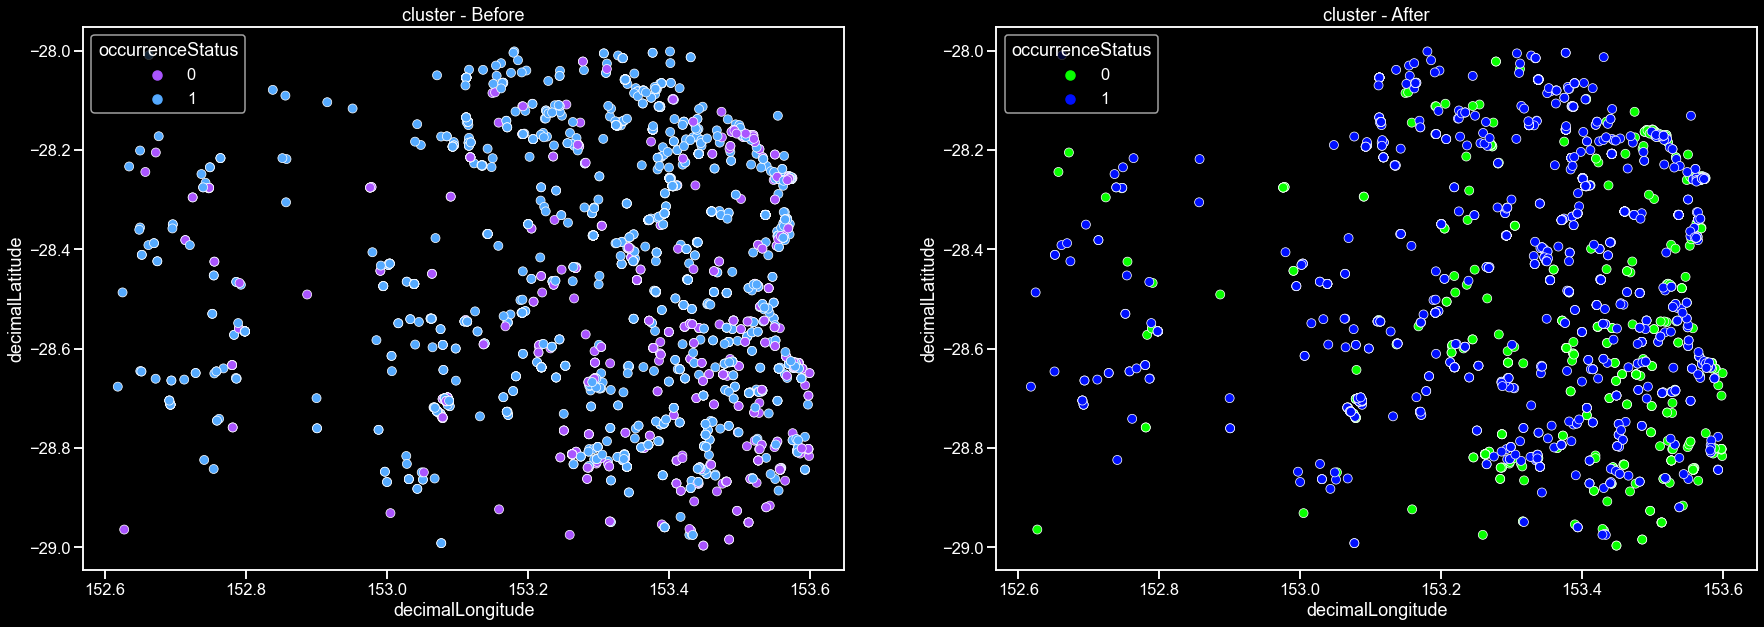

In [73]:
cluster2 = all_frog_data.loc[all_frog_data.cluster == '2'].copy()

X_balance_cluster2 = cluster2[[ 'decimalLatitude', 'decimalLongitude','cluster']]
y_balance_cluster2 = cluster2['occurrenceStatus']

# define undersample strategy
print(Counter(y_balance_cluster2))
undersample = RandomUnderSampler(sampling_strategy=0.7)
X_res, y_res = undersample.fit_resample(X_balance_cluster2, y_balance_cluster2)
print(Counter(y_res))
cluster2_fnl = pd.concat([X_res, y_res],axis=1)

fig, ax = plt.subplots(1,2, figsize = (30, 10))
sns.scatterplot(x = cluster2.decimalLongitude,  
                y = cluster2.decimalLatitude, 
                hue=cluster2.occurrenceStatus, palette='cool_r', ax=ax[0]).set_title('cluster - Before')
sns.scatterplot(x = cluster2_fnl.decimalLongitude,  
                y = cluster2_fnl.decimalLatitude, 
                hue=cluster2_fnl.occurrenceStatus, palette='hsv', ax=ax[1]).set_title('cluster - After')

Counter({1: 1138, 0: 206})
Counter({1: 457, 0: 206})


Text(0.5, 1.0, 'cluster - After')

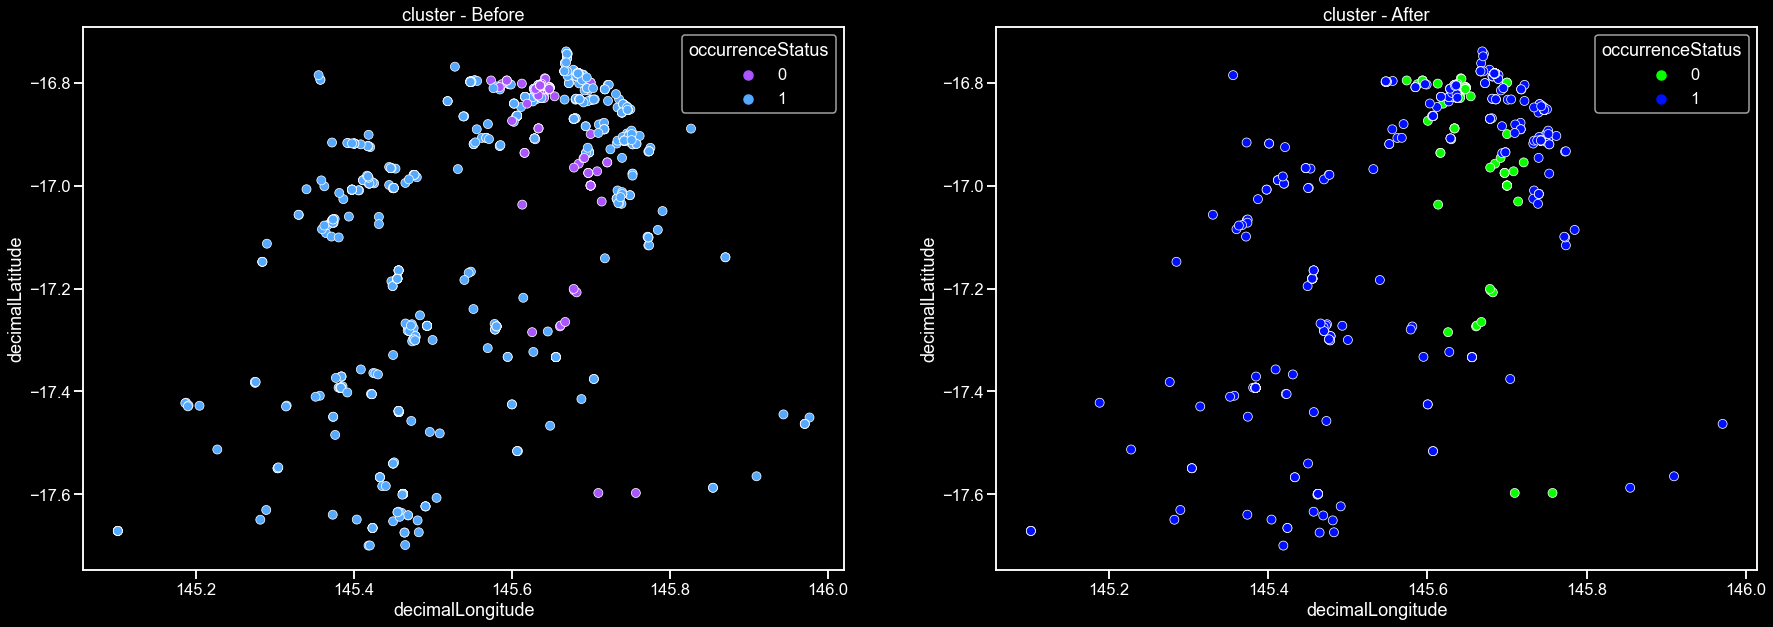

In [82]:
cluster3 = all_frog_data.loc[all_frog_data.cluster == '3'].copy()

X_balance_cluster3 = cluster3[[ 'decimalLatitude', 'decimalLongitude','cluster']]
y_balance_cluster3 = cluster3['occurrenceStatus']

# define undersample strategy
print(Counter(y_balance_cluster3))
undersample = RandomUnderSampler(sampling_strategy=0.45)
X_res, y_res = undersample.fit_resample(X_balance_cluster3, y_balance_cluster3)
print(Counter(y_res))
cluster3_fnl = pd.concat([X_res, y_res],axis=1)

fig, ax = plt.subplots(1,2, figsize = (30, 10))
sns.scatterplot(x = cluster3.decimalLongitude,  
                y = cluster3.decimalLatitude, 
                hue=cluster3.occurrenceStatus, palette='cool_r', ax=ax[0]).set_title('cluster - Before')
sns.scatterplot(x = cluster3_fnl.decimalLongitude,  
                y = cluster3_fnl.decimalLatitude, 
                hue=cluster3_fnl.occurrenceStatus, palette='hsv', ax=ax[1]).set_title('cluster - After')

Counter({0: 6714})
Counter({0: 1007})


Text(0.5, 1.0, 'cluster - After')

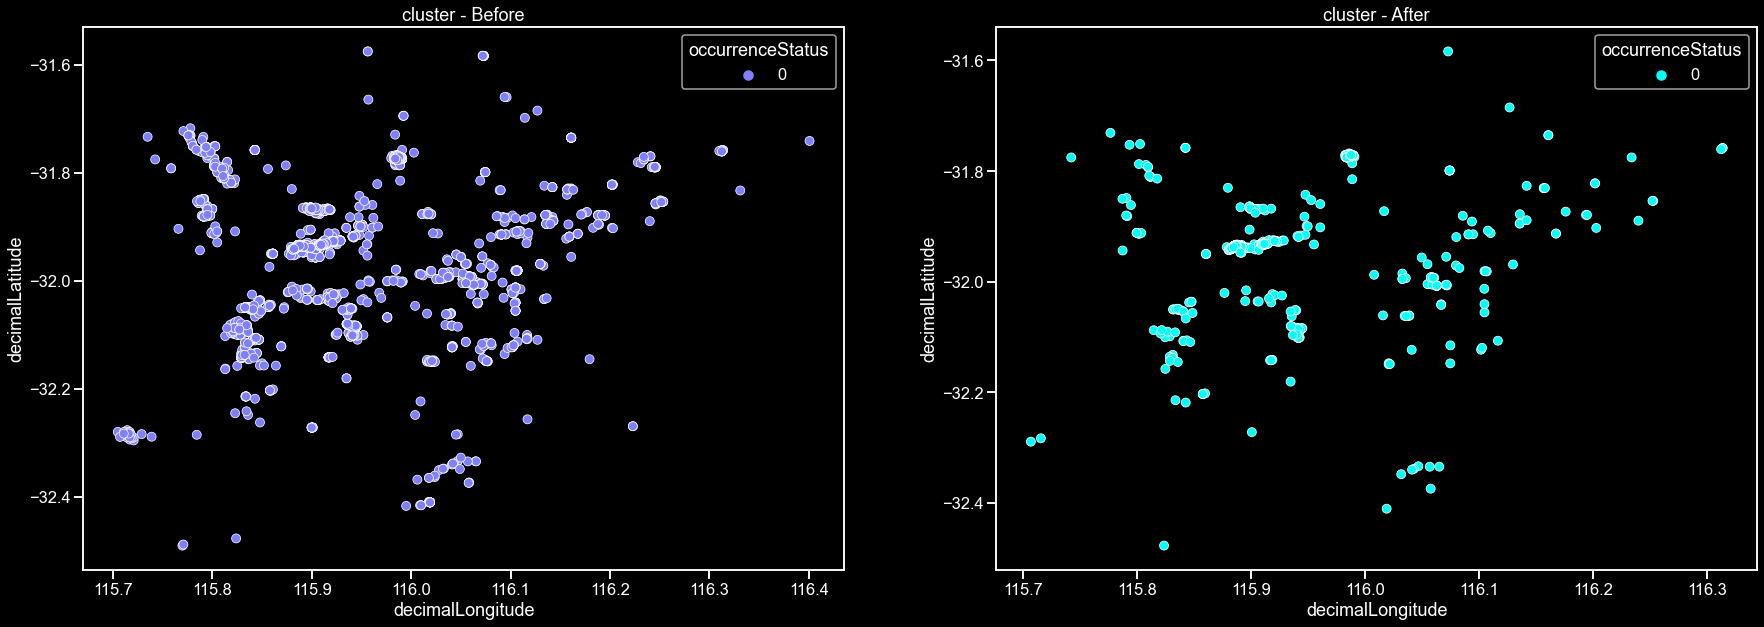

In [85]:
cluster4 = all_frog_data.loc[all_frog_data.cluster == '4'].copy()

X_balance_cluster4 = cluster4[[ 'decimalLatitude', 'decimalLongitude','cluster']]
y_balance_cluster4 = cluster4['occurrenceStatus']

# define undersample strategy
print(Counter(y_balance_cluster4))
cluster4_under = cluster4.sample(frac=0.15)
X_res = cluster4_under[[ 'decimalLatitude', 'decimalLongitude','cluster']]
y_res = cluster4_under['occurrenceStatus']
print(Counter(y_res))
cluster4_fnl = pd.concat([X_res, y_res],axis=1)


fig, ax = plt.subplots(1,2, figsize = (30, 10))
sns.scatterplot(x = cluster4.decimalLongitude,  
                y = cluster4.decimalLatitude, 
                hue=cluster4.occurrenceStatus, palette='cool_r', ax=ax[0]).set_title('cluster - Before')
sns.scatterplot(x = cluster4_fnl.decimalLongitude,  
                y = cluster4_fnl.decimalLatitude, 
                hue=cluster4_fnl.occurrenceStatus, palette='hsv', ax=ax[1]).set_title('cluster - After')


In [88]:
#Merge all 

final_frog_data = pd.concat([cluster0_fnl,cluster1_fnl,cluster2_fnl,cluster3_fnl,cluster4_fnl],axis = 0)

In [91]:
final_frog_data = final_frog_data.iloc[:,:4].reset_index(drop=True)

In [99]:
#final_frog_data.to_csv('final_cluster_frog.csv')
final_data = pd.read_csv('final_cluster_frog.csv').drop('Unnamed: 0', axis=1)
final_data

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus
0,-38.369245,144.979495,0,0
1,-38.322200,145.190000,0,0
2,-37.718300,145.053000,0,0
3,-37.733000,144.973000,0,0
4,-37.796300,145.112000,0,0
...,...,...,...,...
19770,-31.947500,115.891000,4,0
19771,-31.879395,116.194904,4,0
19772,-32.119700,116.102869,4,0
19773,-31.771600,115.988000,4,0


In [101]:


X_balance = final_data[[ 'decimalLatitude', 'decimalLongitude','cluster']]
y_balance = final_data['occurrenceStatus']

# summarize class distribution
print(Counter(y_balance))

#define pipeline
smt = SMOTETomek(sampling_strategy = 'auto')
X_res, y_res = smt.fit_resample(X_balance, y_balance)



# # define undersample strategy
# undersample = RandomUnderSampler(sampling_strategy=1)
# X_res, y_res = undersample.fit_resample(X_balance, y_balance)


all_frog_data = pd.concat([X_res, y_res], axis=1)
# summarize class distribution
print(Counter(y_res))

Counter({0: 10341, 1: 9434})
Counter({0: 10161, 1: 10161})


In [102]:
len(all_frog_data)

20322

In [103]:
all_frog_data = (
    all_frog_data.reset_index(drop=True).assign(key= lambda x: x.index))
all_frog_data.cluster = all_frog_data.cluster.astype(int)
all_frog_data

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key
0,-38.369245,144.979495,0,0,0
1,-38.322200,145.190000,0,0,1
2,-37.718300,145.053000,0,0,2
3,-37.733000,144.973000,0,0,3
4,-37.796300,145.112000,0,0,4
...,...,...,...,...,...
20317,-33.324900,151.365000,1,1,20317
20318,-33.007409,151.550000,1,1,20318
20319,-32.757191,151.594529,1,1,20319
20320,-33.324900,151.365000,1,1,20320


In [104]:
all_frog_data.groupby(['cluster','occurrenceStatus']).count()['key']

cluster  occurrenceStatus
0        0                    430
         1                    149
1        0                   7765
         1                   8322
2        0                    760
         1                   1195
3        0                    199
         1                    495
4        0                   1007
Name: key, dtype: int64

In [105]:
for bbox_num in range(len(bbox_coordinates)):
    print(list(bbox_coordinates.values())[bbox_num])

(144.8, -38.5, 145.8, -37.5)
(150.7, -33.5, 151.7, -32.5)
(152.6, -29.0, 153.6, -28.0)
(145.0, -17.7, 146.0, -16.7)
(115.7, -32.5, 116.7, -31.5)


In [106]:
for bbox in list(bbox_coordinates.values()):
                 print(bbox)

(144.8, -38.5, 145.8, -37.5)
(150.7, -33.5, 151.7, -32.5)
(152.6, -29.0, 153.6, -28.0)
(145.0, -17.7, 146.0, -16.7)
(115.7, -32.5, 116.7, -31.5)


In [107]:
def get_terraclimate(bbox, metrics, time_slice=None, assets=None, features=None, interp_dims=None, verbose=True):
    """Returns terraclimate metrics for a given area, allowing results to be interpolated onto a larger image.
    
    Attributes:
    bbox -- Tuple of (min_lon, min_lat, max_lon, max_lat) to define area
    metrics -- Nested dictionary in the form {<metric_name>:{'fn':<metric_function>,'params':<metric_kwargs_dict>}, ... }
    time_slice -- Tuple of datetime strings to select data between, e.g. ('2015-01-01','2019-12-31')
    assets -- list of terraclimate assets to take
    features -- list of asset metrics to take, specified by strings in the form '<asset_name>_<metric_name>'
    interp_dims -- Tuple of dimensions (n, m) to interpolate results to
    """
    min_lon, min_lat, max_lon, max_lat = bbox
    
    collection = pystac.read_file("https://planetarycomputer.microsoft.com/api/stac/v1/collections/terraclimate")
    asset = collection.assets["zarr-https"]
    store = fsspec.get_mapper(asset.href)
    data = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"])
    
    # Select datapoints that overlap region
    if time_slice is not None:
        data = data.sel(lon=slice(min_lon,max_lon),lat=slice(max_lat,min_lat),time=slice(time_slice[0],time_slice[1]))
    else:
        data = data.sel(lon=slice(min_lon,max_lon),lat=slice(max_lat,min_lat))
    if assets is not None:
        data = data[assets]
    print('Loading data') if verbose else None
    data = data.rename(lat='y', lon='x').to_array().compute()
        
    # Calculate metrics
    combined_values = []
    combined_bands = []
    for name, metric in metrics.items():
        print(f'Calculating {name}') if verbose else None
        sum_data = xr.apply_ufunc(
            metric['fn'], data, input_core_dims=[["time"]], kwargs=metric['params'], dask = 'allowed', vectorize = True
        ).rename(variable='band')
        xcoords = sum_data.x
        ycoords = sum_data.y
        dims = sum_data.dims
        combined_values.append(sum_data.values)
        for band in sum_data.band.values:
            combined_bands.append(band+'_'+name)
        
    # Combine metrics
    combined_values = np.concatenate(
        combined_values,
        axis=0
    )
    combined_data = xr.DataArray(
        data=combined_values,
        dims=dims,
        coords=dict(
            band=combined_bands,
            y=ycoords,
            x=xcoords
        )
    )    

    # Take relevant bands:
    combined_data = combined_data.sel(band=features)
    
    if interp_dims is not None:
        print(f'Interpolating image') if verbose else None
        interp_coords = (np.linspace(bbox[0], bbox[2], interp_dims[0]), np.linspace(bbox[1], bbox[3], interp_dims[1]))
        combined_data = combined_data.interp(x=interp_coords[0], y=interp_coords[1], method='nearest', kwargs={"fill_value": "extrapolate"})
    
    return combined_data

In [108]:
def join_frogs(frogs, data):
    """Collects the data for each frog location and joins it onto the frog data 

    Arguments:
    frogs -- dataframe containing the response variable along with ["decimalLongitude", "decimalLatitude", "key"]
    data -- xarray dataarray of features, indexed with geocoordinates
    """
    return frogs.merge(
        (
            data
            .rename('data')
            .sel(
                x=xr.DataArray(frogs.decimalLongitude, dims="key", coords={"key": frogs.key}), 
                y=xr.DataArray(frogs.decimalLatitude, dims="key", coords={"key": frogs.key}),
                method="nearest"
            )
            .to_dataframe()
            .assign(val = lambda x: x.iloc[:, -1])
            [['val']]
            .reset_index()
            .drop_duplicates()
            .pivot_table(index="key", columns="band", values="val")
            .reset_index()
        ),
        on = ['key'],
        how = 'inner'
    )

In [110]:
# Metrics to measure over time dimension
tc_metrics = {
    'mean':{
        'fn':np.nanmean,
        'params':{}
    },
    'min':{
        'fn':np.nanmin,
        'params':{}
    },
    'max':{
        'fn':np.nanmax,
        'params':{}
    }
}

# Date range to take
time_slice = ('2000-01-01','2021-12-31')

# Measurements to take
assets=['tmax', 'tmin', 'ppt', 'soil',
       'aet', 
        'def', 
        'pet', 
        'vap', 
        'vpd', 
        'pdsi', 
        'srad']

# Features to take, in form '<asset>_<metric>'
features=['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 
          'aet_mean', 
          'def_mean', 
          'pet_mean',
          'vap_mean', 
          'vpd_mean', 
          'pdsi_mean', 
          'srad_mean']

# Interpolate values to a 512x512 image
interp_dims = (512, 512)


model_data = pd.DataFrame()

for bbox_num in range(len(bbox_coordinates)):
    
    bbox = list(bbox_coordinates.values())[bbox_num]
    
    frog_data_temp = all_frog_data.loc[all_frog_data.cluster == bbox_num]
    
    weather_data = get_terraclimate(bbox, tc_metrics, time_slice=time_slice, assets=assets, features=features, interp_dims=interp_dims)
    display(weather_data.band.values)
    
    model_temp = join_frogs(frog_data_temp, weather_data)
    
    model_data = pd.concat([model_data,model_temp])

C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


Loading data
Calculating mean


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))


Calculating min
Calculating max


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: All-NaN slice encountered
  results = func(*(arg[index] for arg in args))


Interpolating image


array(['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 'aet_mean',
       'def_mean', 'pet_mean', 'vap_mean', 'vpd_mean', 'pdsi_mean',
       'srad_mean'], dtype='<U9')

Loading data
Calculating mean


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))


Calculating min
Calculating max
Interpolating image


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: All-NaN slice encountered
  results = func(*(arg[index] for arg in args))


array(['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 'aet_mean',
       'def_mean', 'pet_mean', 'vap_mean', 'vpd_mean', 'pdsi_mean',
       'srad_mean'], dtype='<U9')

Loading data
Calculating mean


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))


Calculating min
Calculating max
Interpolating image


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: All-NaN slice encountered
  results = func(*(arg[index] for arg in args))


array(['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 'aet_mean',
       'def_mean', 'pet_mean', 'vap_mean', 'vpd_mean', 'pdsi_mean',
       'srad_mean'], dtype='<U9')

Loading data
Calculating mean


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))
C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: All-NaN slice encountered
  results = func(*(arg[index] for arg in args))


Calculating min
Calculating max
Interpolating image


array(['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 'aet_mean',
       'def_mean', 'pet_mean', 'vap_mean', 'vpd_mean', 'pdsi_mean',
       'srad_mean'], dtype='<U9')

Loading data
Calculating mean


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: Mean of empty slice
  results = func(*(arg[index] for arg in args))


Calculating min
Calculating max
Interpolating image


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\numpy\lib\function_base.py:2277: RuntimeWarning: All-NaN slice encountered
  results = func(*(arg[index] for arg in args))


array(['tmax_mean', 'tmin_mean', 'ppt_mean', 'soil_mean', 'aet_mean',
       'def_mean', 'pet_mean', 'vap_mean', 'vpd_mean', 'pdsi_mean',
       'srad_mean'], dtype='<U9')

In [111]:
model_data.head()

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean
0,-38.369245,144.979495,0,0,0,57.349998,37.020832,-2.745000,94.287498,63.779167,55.966667,176.204163,18.239588,10.112501,1.173500,0.518375
1,-38.322200,145.190000,0,0,1,55.075001,44.933334,-3.302917,99.974998,58.470833,53.091667,177.887497,19.442921,10.526251,1.211417,0.586833
2,-37.718300,145.053000,0,0,2,51.862499,57.745834,-2.907916,109.558334,54.608334,24.887501,179.033340,20.685835,10.147502,1.149333,0.738208
3,-37.733000,144.973000,0,0,3,46.799999,62.987499,-2.806249,109.704170,49.241665,15.220834,178.625000,20.606668,10.179585,1.158167,0.720208
4,-37.796300,145.112000,0,0,4,55.424999,54.179165,-3.036666,109.562500,58.387501,32.445835,178.795837,20.659586,10.347918,1.153167,0.737917


In [112]:
model_data.tail()

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean
1002,-31.947500,115.891000,4,0,19426,49.916668,92.229164,-2.093750,142.108337,54.462502,58.495834,232.899994,24.615835,13.185419,1.324500,1.062833
1003,-31.879395,116.194904,4,0,19427,49.000000,81.824997,-1.217500,130.824997,67.033333,53.987499,231.512497,23.118753,10.332501,1.135708,1.000167
1004,-32.119700,116.102869,4,0,19428,53.062500,76.050003,-1.493750,129.120834,77.266670,66.079170,231.070831,22.762918,10.581252,1.161458,0.952500
1005,-31.771600,115.988000,4,0,19429,47.091667,93.679169,-1.676666,140.766663,53.795834,49.404167,233.633331,24.751253,12.317919,1.283958,1.088125
1006,-31.770800,115.988000,4,0,19430,47.091667,93.679169,-1.676666,140.766663,53.795834,49.404167,233.633331,24.751253,12.317919,1.283958,1.088125


In [113]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20280 entries, 0 to 1006
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   decimalLatitude   20280 non-null  float64
 1   decimalLongitude  20280 non-null  float64
 2   cluster           20280 non-null  int32  
 3   occurrenceStatus  20280 non-null  int64  
 4   key               20280 non-null  int64  
 5   aet_mean          20280 non-null  float32
 6   def_mean          20280 non-null  float32
 7   pdsi_mean         20280 non-null  float32
 8   pet_mean          20280 non-null  float32
 9   ppt_mean          20280 non-null  float32
 10  soil_mean         20280 non-null  float32
 11  srad_mean         20280 non-null  float32
 12  tmax_mean         20280 non-null  float32
 13  tmin_mean         20280 non-null  float32
 14  vap_mean          20280 non-null  float32
 15  vpd_mean          20280 non-null  float32
dtypes: float32(11), float64(2), int32(1), int

In [115]:
model_data.to_csv('terraclimate2000_2021_10_features.csv')

In [116]:
model_data.describe()

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean
count,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000
mean,-32.252758,149.443168,1.285207,0.500493,10167.417949,76.771355,35.518623,-1.811718,112.257553,90.770790,84.051308,199.316956,23.549383,12.811546,1.466744,0.768136
std,3.320713,7.829645,0.792065,0.500012,5866.871240,11.700131,15.534148,0.319054,8.653518,22.138880,45.573582,10.515992,1.272989,1.513396,0.175049,0.088648
min,-38.498100,115.707234,0.000000,0.000000,0.000000,38.508335,12.725000,-3.705416,90.387497,40.537498,5.400000,176.120834,17.325003,6.448751,0.980958,0.518375
25%,-33.324900,151.356977,1.000000,0.000000,5086.750000,74.091667,28.145834,-1.867916,107.566666,81.212502,71.541664,194.629166,22.940002,12.382502,1.426958,0.721292
50%,-33.283426,151.365000,1.000000,1.000000,10176.500000,79.441666,28.366667,-1.865000,110.045830,93.687500,77.537498,195.795837,23.179167,12.382502,1.426958,0.733792
75%,-32.807300,151.479180,1.000000,1.000000,15247.250000,80.587502,37.299999,-1.717500,113.400002,94.654167,82.837502,197.954163,23.910835,13.185419,1.476458,0.768333
max,-16.739402,153.599672,4.000000,1.000000,20321.000000,116.820831,95.958336,0.195417,144.250000,297.283325,403.029175,235.012497,29.426668,20.836670,2.424583,1.129917


In [141]:
# Separate the predictor variables from the response
X = (
    model_data
    .drop(['decimalLatitude', 'decimalLongitude', 'occurrenceStatus', 'key','cluster'], 1).reset_index(drop=True)
)
y = model_data.occurrenceStatus.astype(int)

C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [142]:
#PREDICTOR VARIABLES
X

,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,soil_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean
0,57.349998,37.020832,-2.745000,94.287498,63.779167,55.966667,176.204163,18.239588,10.112501,1.173500,0.518375
1,55.075001,44.933334,-3.302917,99.974998,58.470833,53.091667,177.887497,19.442921,10.526251,1.211417,0.586833
2,51.862499,57.745834,-2.907916,109.558334,54.608334,24.887501,179.033340,20.685835,10.147502,1.149333,0.738208
3,46.799999,62.987499,-2.806249,109.704170,49.241665,15.220834,178.625000,20.606668,10.179585,1.158167,0.720208
4,55.424999,54.179165,-3.036666,109.562500,58.387501,32.445835,178.795837,20.659586,10.347918,1.153167,0.737917
...,...,...,...,...,...,...,...,...,...,...,...
20275,49.916668,92.229164,-2.093750,142.108337,54.462502,58.495834,232.899994,24.615835,13.185419,1.324500,1.062833
20276,49.000000,81.824997,-1.217500,130.824997,67.033333,53.987499,231.512497,23.118753,10.332501,1.135708,1.000167
20277,53.062500,76.050003,-1.493750,129.120834,77.266670,66.079170,231.070831,22.762918,10.581252,1.161458,0.952500
20278,47.091667,93.679169,-1.676666,140.766663,53.795834,49.404167,233.633331,24.751253,12.317919,1.283958,1.088125


In [143]:
#TARGET VARIABLES
y

0       0
1       0
2       0
3       0
4       0
       ..
1002    0
1003    0
1004    0
1005    0
1006    0
Name: occurrenceStatus, Length: 20280, dtype: int32

In [144]:
y.value_counts()

1    10150
0    10130
Name: occurrenceStatus, dtype: int64

# example of a standardization
from sklearn.preprocessing import StandardScaler
# define data
data = X
# define standard scaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(data)

In [145]:
X_scaled = X


from imblearn.combine import SMOTETomek
from collections import Counter



X_balance = X
y_balance = y

# summarize class distribution
print(Counter(y_balance))

smt = SMOTETomek(sampling_strategy = 'all')
X_res, y_res = smt.fit_resample(X_balance, y_balance)

# all_frog_data = pd.concat([X_res, y_res], axis=1)
# summarize class distribution
print(Counter(y_res))

pairplot_data = pd.concat([X_res,y_res], axis=1)

sns.pairplot(pairplot_data)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=50)

In [147]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5) 

In [148]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)
    print(f"F1 Score: {np.mean(f1_score(y_test, preds)).round(2)}")
    print(f"Accuracy: {np.mean(accuracy_score(y_test, preds)).round(2)}")

In [149]:
### Logisitic Regression

LR = LogisticRegression()

#Parameters
solvers = ['newton-cg', 'lbfgs']
penalty = ['l2']
c_values = [300, 250,200,100]

#ParametersGrid
lr_param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#GridSearchCV
gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsLR.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [300, 250, 200, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy', verbose=1)

C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Best : 0.6064381675753713, using {'C': 200, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.70      0.37      0.48      3040
           1       0.57      0.84      0.68      3044

    accuracy                           0.61      6084
   macro avg       0.64      0.61      0.58      6084
weighted avg       0.64      0.61      0.58      6084

F1 Score: 0.68
Accuracy: 0.61


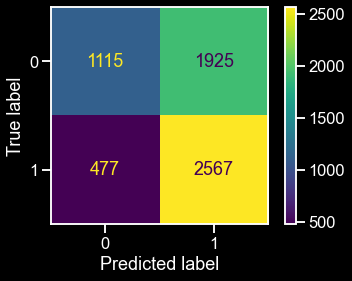

In [150]:
# Summarize the results
LR_best = gsLR.best_estimator_
print('Best : {}, using {}'.format(gsLR.best_score_,gsLR.best_params_))
report(gsLR)

# Train the model
LSVC = LinearSVC()

#Parameters
class_weight=[None]
dual=[True]
tol=[1e-3,1e-2]
max_iter=[1e5]

#ParametersGrid
lsvc_param_grid = dict(class_weight=class_weight,dual=dual,tol=tol,max_iter=max_iter)

#GridSearchCV
gsLSVC = GridSearchCV(LSVC,param_grid = lsvc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsLSVC.fit(X_train,y_train)

#Summarize the results
LSVC_best = gsLSVC.best_estimator_
print('Best : {}, using {}'.format(gsLSVC.best_score_,gsLSVC.best_params_))
report(gsLSVC)

In [157]:
RFC = RandomForestClassifier()
RFC.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [168]:
##### Train the model
RFC = RandomForestClassifier()


#Parameters
rf_param_grid = {"max_depth": [20,40,55],
              "bootstrap": [True],
              "n_estimators" :[10,15,20,100],
              "criterion": ["gini","entropy"],
                 "class_weight" : ["balanced"],            
                "max_leaf_nodes":[None, 5, 10, 20,100]}

# n_estimators=1000,criterion='conf',conf=[0.95,0.95]

#GridSearchCV
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 2)
gsRFC.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, 55],
                         'max_leaf_nodes': [None, 5, 10, 20, 100],
                         'n_estimators': [10, 15, 20, 100]},
             scoring='accuracy')

Best : 0.6653986476095035, using {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 100, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.73      0.51      0.60      3040
           1       0.62      0.81      0.71      3044

    accuracy                           0.66      6084
   macro avg       0.68      0.66      0.65      6084
weighted avg       0.68      0.66      0.65      6084



C:\Users\Vignesh R Babu\.conda\envs\frogs\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


F1 Score: 0.71
Accuracy: 0.66


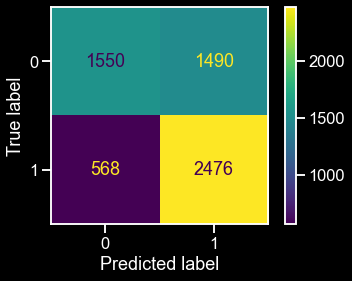

In [169]:
# Summarize the results
RFC_best = gsRFC.best_estimator_
print('Best : {}, using {}'.format(gsRFC.best_score_,gsRFC.best_params_))
report(gsRFC)

#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None, 10, 20, 50],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False,True],
              "n_estimators" :[200,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(X_train,y_train)

# Summarize the results
ExtC_best = gsExtC.best_estimator_
print('Best : {}, using {}'.format(gsExtC.best_score_,gsExtC.best_params_))
report(gsExtC)

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf','linear','poly','sigmoid'], 
                  'gamma': ['scale','auto'],
                  'C': [1,100,300,500]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 2)

gsSVMC.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
# Summarize the results
SVMC_best = gsSVMC.best_estimator_
print('Best : {}, using {}'.format(gsSVMC.best_score_,gsSVMC.best_params_))
report(gsSVMC)

In [ ]:
#MLP

MLP = MLPClassifier()

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50),(100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}
gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsMLP.fit(X_train,y_train)

In [ ]:
# Summarize the results
MLP_best = gsMLP.best_estimator_
print('Best : {}, using {}'.format(gsMLP.best_score_,gsMLP.best_params_))
report(gsMLP)

In [ ]:
#XGBooster

XGB = XGBClassifier()

xgb_param_grid = {"learning_rate"    : [0.01,0.1,0.2] ,
                  "max_depth"        : [6,8,9],
                  "gamma"            : [ 0.0, 0.1, 0.2],
                  "colsample_bytree" : [ 0.5,0.6 ] }

gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_train)

In [ ]:
# Summarize the results
XGB_Best = gsXGB.best_estimator_
print('Best : {}, using {}'.format(gsXGB.best_score_,gsXGB.best_params_))
report(gsXGB)

In [ ]:
df1

In [ ]:
def join_frogs_sub(frogs, data):
    """Collects the data for each frog location and joins it onto the frog data 

    Arguments:
    frogs -- dataframe containing the response variable along with ["decimalLongitude", "decimalLatitude", "key"]
    data -- xarray dataarray of features, indexed with geocoordinates
    """
    return frogs.merge(
        (
            data
            .rename('data')
            .sel(
                x=xr.DataArray(df1.decimalLongitude, dims="id", coords={"id": df1.id}), 
                y=xr.DataArray(df1.decimalLatitude, dims="id", coords={"id": df1.id}),
                method="nearest"
            )
            .to_dataframe()
            .assign(val = lambda x: x.iloc[:, -1])
            [['val']]
            .reset_index()
            .drop_duplicates()
            .pivot(index="id", columns="band", values="val")
            .reset_index()
        ),
        on = ['id'],
        how = 'inner'
    )
    
test_data = join_frogs_sub(df1, weather_data)
test_data.head()

In [ ]:
data = test_data.iloc[:,-12:]
# define standard scaler
scaler = StandardScaler()
# transform data
test_Scaled = scaler.fit_transform(data)

In [ ]:
test_Scaled

In [ ]:
def get_result(model,test_Scaled):
    test_result = model.predict(test_Scaled)
    df1.occurrenceStatus = test_result
    print(df1.occurrenceStatus.value_counts())
    

In [ ]:
get_result(gsLR, test_Scaled)

In [ ]:
get_result(gsRFC, test_Scaled)

get_result(gsExtC, test_Scaled)

In [ ]:
get_result(gsSVMC, test_Scaled)

In [ ]:
get_result(gsMLP, test_Scaled)

In [ ]:
get_result(gsXGB, test_Scaled)

In [ ]:
df1.to_csv('gsMLP.csv')
